# Part 1

Load dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes_prediction_dataset.csv", sep=",")

df = df[0:10000]

print(df)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  80.0             0              1           never  25.19   
1     Female  54.0             0              0         No Info  27.32   
2       Male  28.0             0              0           never  27.32   
3     Female  36.0             0              0         current  23.45   
4       Male  76.0             1              1         current  20.14   
...      ...   ...           ...            ...             ...    ...   
9995  Female   9.0             0              0           never  25.28   
9996    Male  59.0             0              0            ever  35.00   
9997    Male   2.0             0              0           never  17.43   
9998    Male  61.0             1              0            ever  31.89   
9999    Male  43.0             0              0           never  30.24   

      HbA1c_level  blood_glucose_level  diabetes  
0             6.6                  140         0  
1        

Format dataset

In [2]:
#Remove duplicates
df = df.drop_duplicates()

#Remove Other category
df = df[df['gender'] != 'Other']

#Remove 'ever' category
df = df[df['smoking_history'] != 'ever']

print(df)

      gender   age  hypertension  heart_disease smoking_history    bmi  \
0     Female  80.0             0              1           never  25.19   
1     Female  54.0             0              0         No Info  27.32   
2       Male  28.0             0              0           never  27.32   
3     Female  36.0             0              0         current  23.45   
4       Male  76.0             1              1         current  20.14   
...      ...   ...           ...            ...             ...    ...   
9993  Female  51.0             0              0         No Info  23.56   
9994  Female  80.0             1              0           never  27.85   
9995  Female   9.0             0              0           never  25.28   
9997    Male   2.0             0              0           never  17.43   
9999    Male  43.0             0              0           never  30.24   

      HbA1c_level  blood_glucose_level  diabetes  
0             6.6                  140         0  
1        

Convert categorial data into numerical values

In [3]:
def one_hot_encoding(df, column):
    #Perform one-hot encoding on the column and place it in a temp column
    temp = pd.get_dummies(df[column], prefix=column)

    #Replace the original column with the temp column
    df = pd.concat([df.drop(column, axis=1), temp], axis=1)

    return df

#One hot encode the gender column
df = one_hot_encoding(df, 'gender')

#One hot encode the smoking history column
df = one_hot_encoding(df, 'smoking_history')

In [4]:
print(df[0:2])

    age  hypertension  heart_disease    bmi  HbA1c_level  blood_glucose_level  \
0  80.0             0              1  25.19          6.6                  140   
1  54.0             0              0  27.32          6.6                   80   

   diabetes  gender_Female  gender_Male  smoking_history_No Info  \
0         0           True        False                    False   
1         0           True        False                     True   

   smoking_history_current  smoking_history_former  smoking_history_never  \
0                    False                   False                   True   
1                    False                   False                  False   

   smoking_history_not current  
0                        False  
1                        False  


# Correlation Plot

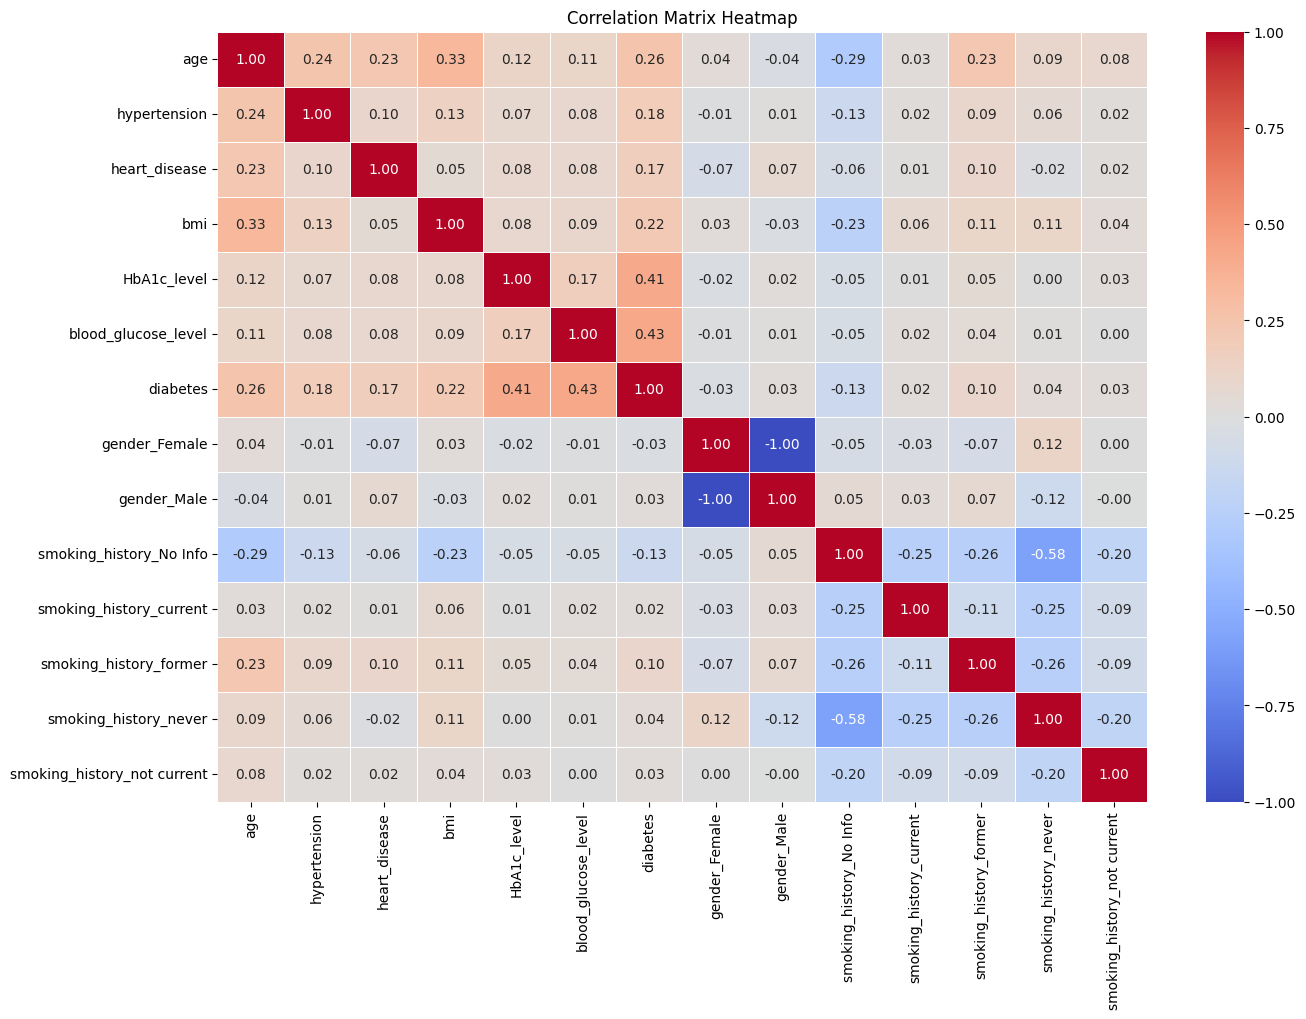

In [5]:
correlation_matrix = df.corr(numeric_only=True)

import seaborn as sns

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

Seperate features and the target (diabetes)

In [6]:
x = np.array( df[['gender_Male','gender_Female','age','hypertension','heart_disease','bmi','HbA1c_level','blood_glucose_level']] )
print(x[0:3])

y = np.array( df['diabetes'] )
print('')
print(y[0:3])

[[False True 80.0 0 1 25.19 6.6 140]
 [False True 54.0 0 0 27.32 6.6 80]
 [True False 28.0 0 0 27.32 5.7 158]]

[0 0 0]


# PCA 

In [7]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 2)
 
x_pca = pca.fit_transform(x)
explained_variance = pca.explained_variance_ratio_
print(x_pca)
print(explained_variance)

[[  5.40447733 -37.63818457]
 [-56.55738227 -17.32086157]
 [ 18.90842066  15.24591534]
 ...
 [-10.64916611  31.83949068]
 [-15.37803598  39.2393389 ]
 [ -7.64170597  -2.36103943]]
[0.75651934 0.22546459]


# UMAP

C:\Users\fchav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


<Axes: >

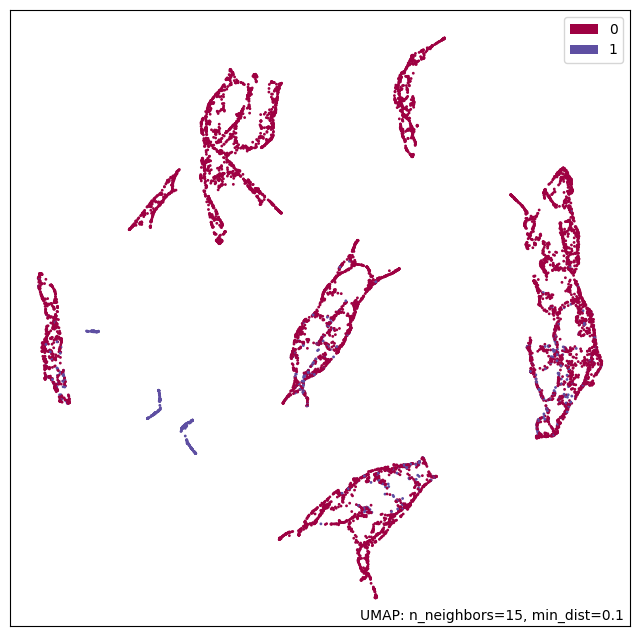

In [8]:
import umap 
import umap.plot

mapper = umap.UMAP().fit(x)
umap.plot.points(mapper, labels=y)

[[12.78702   -7.0227947]
 [ 2.8232186 14.374196 ]
 [16.951853   7.4250875]
 ...
 [ 7.272616   5.9460816]
 [ 9.2882395  6.383952 ]
 [ 4.5086784  2.7882683]]


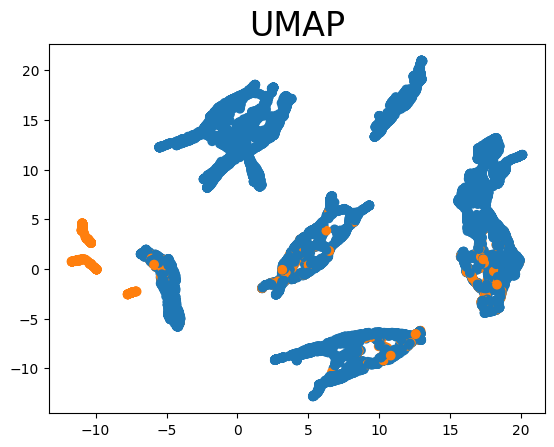

In [9]:
#Alternative way to plot UMAP 

embedding = umap.UMAP().fit_transform(x)
print(embedding)

'''
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.values.map(
        {'gender_Male':0,'gender_Female':1,'age':2,'hypertension':3,'heart_disease':4,'bmi':5,'HbA1c_level':6,'blood_glucose_level':7}
        )])
'''

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.diabetes.map({0: 0, 1: 1})]
)


#plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP', fontsize=24);

# T-SNE

In [10]:
from sklearn.manifold import TSNE


model = TSNE(n_components = 3, random_state = 0)

tsne_data = model.fit_transform(x)

#tsne_data = np.vstack((tsne_data.T, x)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))
 


In [11]:
# Assuming 'X' contains the features and 'y' contains the target variable ('diabetes')
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

# Define the number of folds (k)
k = 5

# Initialize the k-fold cross-validator
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the classifier
classifier = RandomForestClassifier()

# Initialize PCA
pca = PCA(n_components=2)

# Perform k-fold cross-validation
fold_accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply PCA to the training and test data
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Fit the model on the training data
    classifier.fit(X_train_pca, y_train)

    # Make predictions on the test data
    predictions = classifier.predict(X_test_pca)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, predictions)
    fold_accuracies.append(accuracy)

# Print the accuracy for each fold
for i, accuracy in enumerate(fold_accuracies, 1):
    print(f"Fold {i} Accuracy: {accuracy}")

# Calculate and print the average accuracy across all folds
average_accuracy = sum(fold_accuracies) / k
print(f"\nAverage Accuracy: {average_accuracy}")

NameError: name 'KFold' is not defined